Epoch [1/10], Training Loss: 0.0000, Training Accuracy: 80.81%
Validation Loss: 0.4969, Validation Accuracy: 82.18%
Epoch [2/10], Training Loss: 0.2051, Training Accuracy: 83.86%
Validation Loss: 0.5498, Validation Accuracy: 81.27%
Epoch [3/10], Training Loss: 0.1398, Training Accuracy: 84.69%
Validation Loss: 0.5314, Validation Accuracy: 82.78%
Epoch [4/10], Training Loss: 0.0000, Training Accuracy: 85.19%
Validation Loss: 0.5688, Validation Accuracy: 82.51%
Epoch [5/10], Training Loss: 4.9162, Training Accuracy: 85.69%
Validation Loss: 0.5336, Validation Accuracy: 83.46%
Epoch [6/10], Training Loss: 0.5865, Training Accuracy: 85.72%
Validation Loss: 0.4848, Validation Accuracy: 84.06%
Epoch [7/10], Training Loss: 0.4143, Training Accuracy: 86.38%
Validation Loss: 0.5247, Validation Accuracy: 84.52%
Epoch [8/10], Training Loss: 0.0000, Training Accuracy: 86.34%
Validation Loss: 0.5616, Validation Accuracy: 84.18%
Epoch [9/10], Training Loss: 0.0000, Training Accuracy: 86.43%
Validatio

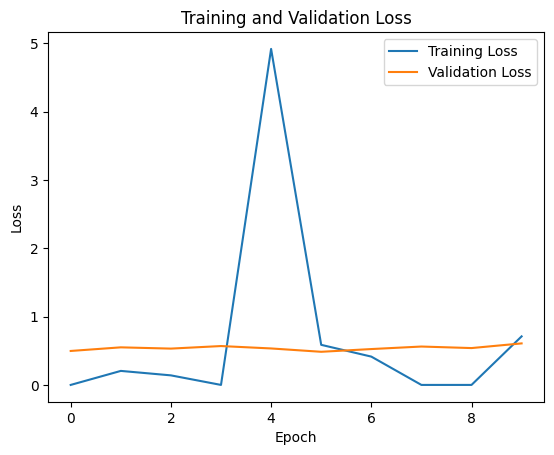

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Custom SNN model
class CustomSNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomSNN, self).__init__()  # Corrected the super statement
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters
num_epochs = 10
sequence_length = 100

# Load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

# Define your custom SNN model
snn_model = CustomSNN(input_size=784, hidden_size=128, output_size=10)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(snn_model.parameters(), lr=0.001)

# Lists to track training and validation losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    correct_train = 0
    total_train = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = snn_model(images)

        # Compute loss and perform backpropagation
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation
    correct_val = 0
    total_val = 0
    val_loss = 0

    snn_model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = snn_model(images)
            val_loss += criterion(outputs, labels).item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_loss /= len(test_loader)
    val_losses.append(val_loss)

    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# Plot the loss curves
plt.figure()
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Save the trained model to a file
torch.save(snn_model.state_dict(), 'custom_snn_model.pth')


In [3]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
snn_model = CustomSNN(input_size=784, hidden_size=128, output_size=10)  # Replace with the correct model class
snn_model.load_state_dict(torch.load('custom_snn_model.pth'))

# Set the model to evaluation mode
snn_model.eval()

# Create an empty list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test data
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 784)
        outputs = snn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels.append(labels.item())
        predicted_labels.append(predicted.item())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate classification report
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", report)

# Calculate confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", confusion)



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.79      1000
           1       0.93      0.97      0.95      1000
           2       0.70      0.80      0.75      1000
           3       0.83      0.85      0.84      1000
           4       0.72      0.73      0.72      1000
           5       0.96      0.92      0.94      1000
           6       0.67      0.52      0.59      1000
           7       0.90      0.96      0.93      1000
           8       0.87      0.97      0.91      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[745   7  22  49   4   2 141   1  29   0]
 [  3 966   1  21   4   0   1   0   4   0]
 [ 19   1 799  14  95   1  55   0  16   0]
 [ 11  50  13 851  22   1  28   0  24   0]
 [  2   4 184  45 727   0 